<a href="https://colab.research.google.com/github/ramjv/VGG16-in-Keras/blob/master/VGG16_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random

In [72]:
xtrain = []
ytrain = []
cdir = os.listdir("/content/sample/train/cats/")
ddir = os.listdir("/content/sample/train/dogs/")

for e, i in enumerate(cdir):
  img = load_img("/content/sample/train/cats/"+i)
  xtrain.append(i)
  ytrain.append(0)

for e, i in enumerate(ddir):
  img = load_img("/content/sample/train/dogs/"+i)
  xtrain.append(i)
  ytrain.append(1)


df = pd.DataFrame({'X_train' : xtrain ,'Y_train' : ytrain
    
})

print(df)

          X_train  Y_train
0   cat.11737.jpg        0
1    cat.4600.jpg        0
2    cat.3570.jpg        0
3    cat.2921.jpg        0
4    cat.2266.jpg        0
5     cat.394.jpg        0
6    cat.9021.jpg        0
7    cat.4865.jpg        0
8    dog.9077.jpg        1
9    dog.6391.jpg        1
10   dog.6768.jpg        1
11   dog.8643.jpg        1
12   dog.1402.jpg        1
13   dog.2423.jpg        1
14   dog.8091.jpg        1
15   dog.1614.jpg        1


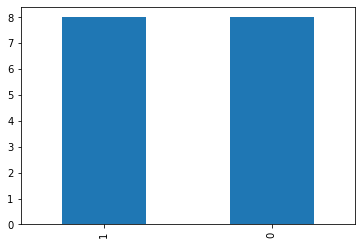

In [73]:
df['Y_train'].value_counts().plot.bar()

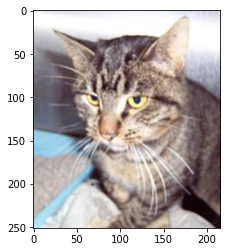

In [74]:
sample = random.choice(cdir)

image = load_img("/content/sample/train/cats/"+sample)
plt.imshow(image)

In [0]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))


In [77]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=tensorflow.keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 56, 56, 256)      